In [23]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

from matplotlib import cm

from timple.timedelta import strftimedelta
from fastf1.core import Laps 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Configuración de gráficos
ff1.plotting.setup_mpl()

# Habilitación de caché 
ff1.Cache.enable_cache('cache')

# Ignorar warnings
pd.options.mode.chained_assignment = None

C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [2]:
# CARGAMOS LA SESIÓN

session = fastf1.get_session(2025, 12, 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\aleja\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count dat

In [4]:
# OBTENEMOS LOS PILOTOS
drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['1', '81', '4', '63', '44', '16', '14', '10', '55', '12', '22', '6', '23', '31', '30', '5', '18', '87', '27', '43']
['VER', 'PIA', 'NOR', 'RUS', 'HAM', 'LEC', 'ALO', 'GAS', 'SAI', 'ANT', 'TSU', 'HAD', 'ALB', 'OCO', 'LAW', 'BOR', 'STR', 'BEA', 'HUL', 'COL']


In [6]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint      Compound  StintLength
0     ALB    1.0  INTERMEDIATE           12
1     ALB    2.0  INTERMEDIATE           30
2     ALB    3.0        MEDIUM           10
3     ALO    1.0  INTERMEDIATE           11
4     ALO    2.0  INTERMEDIATE           26
5     ALO    3.0        MEDIUM           15
6     ANT    1.0  INTERMEDIATE            2
7     ANT    2.0          HARD            7
8     ANT    3.0  INTERMEDIATE           11
9     ANT    4.0  INTERMEDIATE            3
10    BEA    1.0          HARD           10
11    BEA    2.0  INTERMEDIATE           31
12    BEA    3.0        MEDIUM           11
13    BOR    1.0        MEDIUM            4
14    COL    1.0          HARD            1
15    GAS    1.0  INTERMEDIATE           11
16    GAS    2.0  INTERMEDIATE           30
17    GAS    3.0        MEDIUM           11
18    HAD    1.0        MEDIUM           10
19    HAD    2.0  INTERMEDIATE            8
20    HAM    1.0  INTERMEDIATE           11
21    HAM    2.0  INTERMEDIATE  

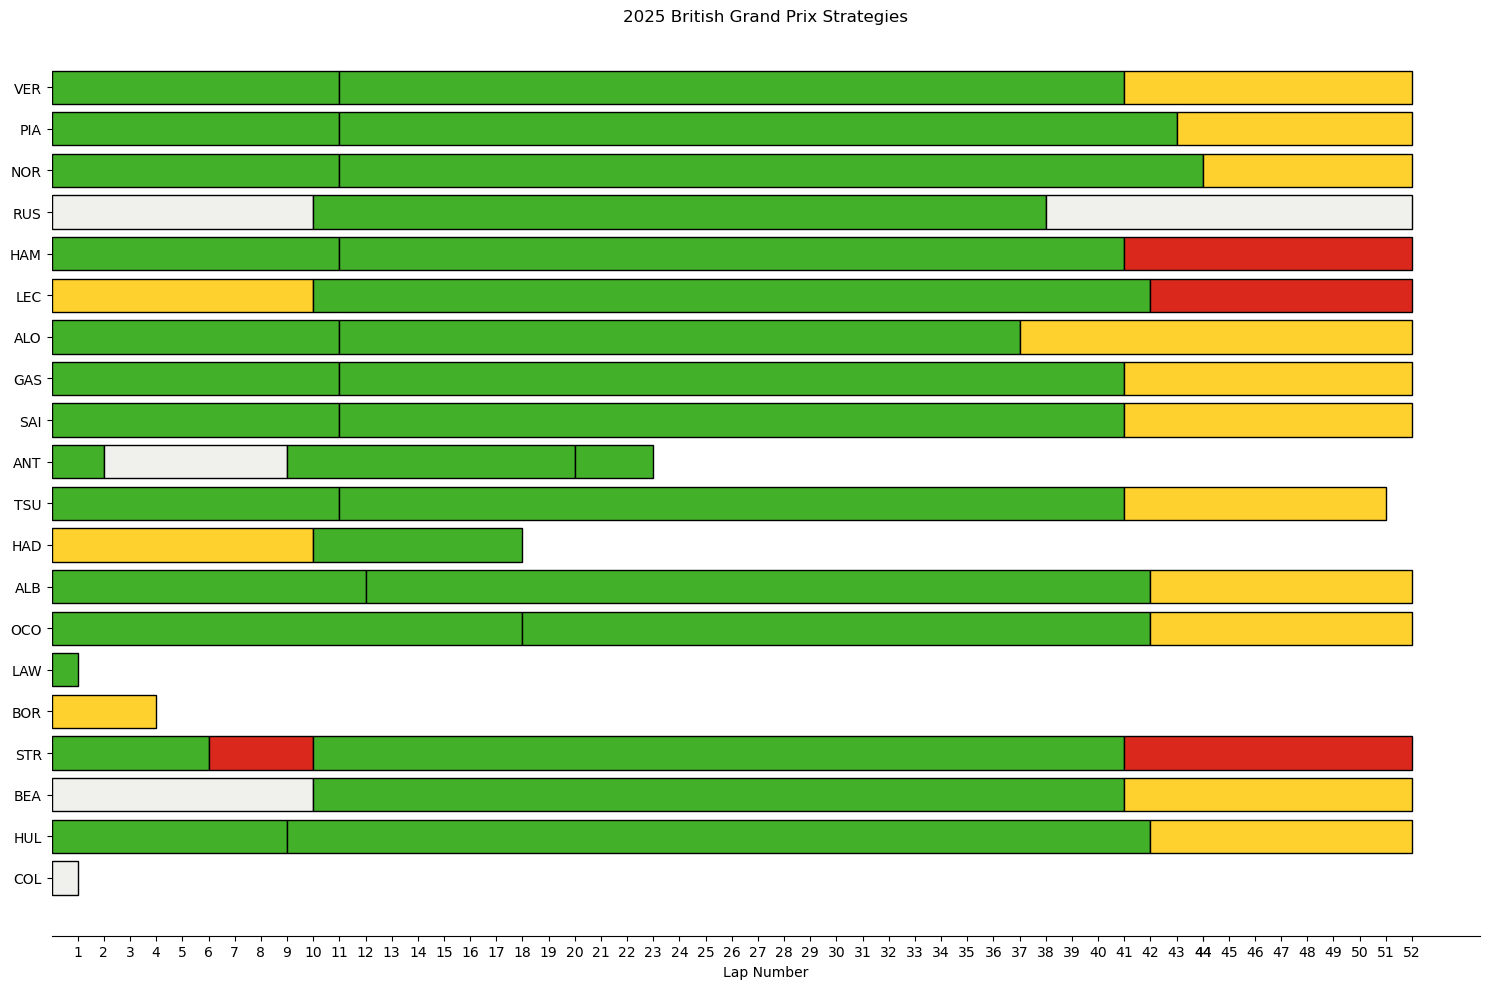

In [16]:
session2 = fastf1.get_session(2024, 12, 'R')
fig, ax = plt.subplots(figsize=(15, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],session=session2)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
plt.title("2025 British Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,44,45,46,47,48,49,50,51,52])
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

  